<h1> APRENDIZAJE NO SUPERVISADO</h1>
<h2> ING DE SISTEMAS</h2>
<h3> Diego Roberto Arancibia Delgado</h3>
<h4>link del repositorio:https://github.com/drArancibiaDelgado/sis420-/tree/main/Examenes/parcial%202<h4>



In [1]:
# Importing necessary libraries
from matplotlib import pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import optimize
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder, StandardScaler
# from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
# Mount Google Drive
# drive.mount('/content/drive')

In [3]:
# Configurar Pandas para que no corte la visualización
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('kc_house_data.csv', delimiter=",")

data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [5]:

# Paso 1: Eliminar columnas innecesarias
data = data.drop(['id', 'date',], axis=1)
# Paso 3: Normalización de características
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))
# Eliminar las columnas 'CustomerId' y 'Surname'



In [6]:
#se vueve a mostrar data para ver que se dropearon las columnas correctamente
data

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [7]:
#se muestra la data escalada
scaled_data

array([[-0.86671733, -0.39873715, -1.44746357, ..., -0.30607896,
        -0.9433552 , -0.26071541],
       [-0.00568792, -0.39873715,  0.1756067 , ..., -0.74634143,
        -0.43268619, -0.18786773],
       [-0.98084935, -1.47395936, -1.44746357, ..., -0.13565477,
         1.07013975, -0.17237524],
       ...,
       [-0.37586519, -1.47395936, -1.77207762, ..., -0.60432128,
        -1.41025258, -0.39414129],
       [-0.38158814, -0.39873715,  0.50022075, ...,  1.02891048,
        -0.8412214 , -0.42051149],
       [-0.58588173, -1.47395936, -1.77207762, ..., -0.60432128,
        -1.41025258, -0.41794772]])

In [8]:
from sklearn.cluster import KMeans
# Seleccionar el número de clusters es un numero que estamos suponiendo no sabemos cuantos clusters son
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)

# Se ajusta el modelo
y_pred = kmeans.fit_predict(scaled_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
y_pred

C:\Users\TERABYTE10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\TERABYTE10\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


array([2, 2, 2, ..., 2, 1, 2])

In [9]:
#se muestra la data escalada
kmeans.cluster_centers_

array([[ 1.52429167,  0.8086056 ,  1.21318906,  1.65754672,  0.51726369,
         0.58315769,  0.39458702,  0.94079319, -0.10539514,  1.51879415,
         1.49747797,  0.6378821 ,  0.39341017,  0.23681627, -0.23850733,
         0.24941493,  0.35030495,  1.49227177,  0.53830545],
       [-0.17196121,  0.11358175,  0.41417013,  0.0705238 , -0.05112328,
         0.60020259, -0.08717263, -0.22766741, -0.35715818,  0.20855884,
         0.23056175, -0.28504582,  0.74785816, -0.14701807, -0.38689197,
        -0.1999911 ,  0.41179808,  0.11318976, -0.04356288],
       [-0.34283168, -0.33879013, -0.69507541, -0.57011814, -0.1218796 ,
        -0.6414556 , -0.05606213, -0.11847469,  0.30647724, -0.63268257,
        -0.64290483,  0.01980199, -0.69551408,  0.03891504,  0.37070471,
         0.07558148, -0.42459678, -0.55135094, -0.13422394]])

In [10]:
import numpy as np

# Seleccionar muestras del conjunto de datos preprocesado y normalizado
X_samples = scaled_data[np.random.choice(scaled_data.shape[0], 4, replace=False)]

# Imprimir las muestras seleccionadas
print("Muestras seleccionadas:")
print(X_samples)

# Utilizar el modelo KMeans para predecir el cluster de las nuevas muestras
y_pred = kmeans.predict(X_samples)
print("Predicciones de cluster para las nuevas muestras:")
print(y_pred)

Muestras seleccionadas:
[[-1.1579038  -2.54918156 -0.14900736 -1.01249983 -0.12783739 -0.915427
  -0.08717263 -0.30575946  0.90755354 -0.55883575 -0.77093638 -0.65868104
  -0.30658149 -0.21012839 -1.43802536 -1.91217923 -0.49780616 -1.1476228
  -0.10828101]
 [-0.7111818  -0.39873715  0.50022075 -0.58785734 -0.18896794 -0.915427
  -0.08717263 -0.30575946 -0.62918687 -0.55883575 -0.85547011  0.38071476
   0.1019607  -0.21012839 -1.40064483 -1.80320157 -0.76764445 -1.11844171
  -0.23178144]
 [ 1.90650014  1.75170727  2.44790506  2.5370758  -0.01755131  0.93650577
  -0.08717263 -0.30575946 -0.62918687  2.84416969  3.16592021 -0.65868104
   1.19140654 -0.21012839 -0.48482183  0.62245357  0.65965808  1.07013975
  -0.0481423 ]
 [-0.58315782  0.67648506 -0.47362141  0.22876281 -0.18655362 -0.915427
  -0.08717263 -0.30575946 -0.62918687 -0.55883575 -0.48110645  1.37491944
  -0.27253631 -0.21012839  1.87015159 -0.40886485 -0.22086687 -1.19139443
  -0.19731705]]
Predicciones de cluster para las n

<h1> CALCULAMOS EL VALOR OPTIMO DE CLOUSTERS USANDO EL METODO DEL CODO Y EL METODO DE LA SILUETA</h1>

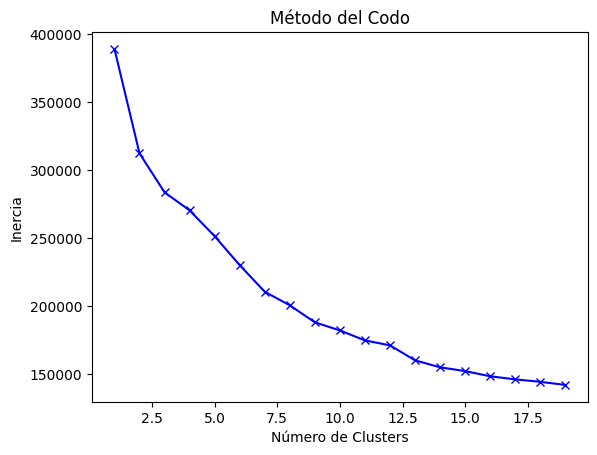

El número óptimo de clusters según el método del codo es: 19


In [11]:
import numpy as np
none_y = scaled_data[:, :-1]

inertias = []
k_range = range(1, 20)  # Prueba con un rango de 1 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(none_y)
    inertias.append(kmeans.inertia_)

# Graficar la curva de inercia
plt.plot(k_range, inertias, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()
best_codo_index = np.argmin(inertias)
best_num_clusters_codo = best_codo_index + 1  # Sumamos 1 ya que comenzamos desde 1 cluster
print("El número óptimo de clusters según el método del codo es:", best_num_clusters_codo)



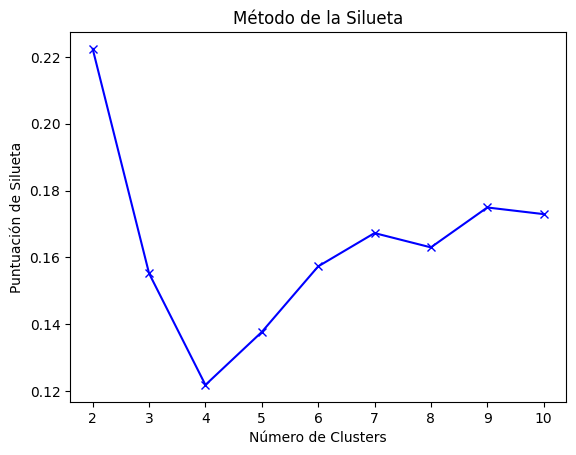

El número óptimo de clusters según la puntuación de silueta es: 2


In [12]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_range = range(2, 11)  # Prueba con un rango de 2 a 10 clusters

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(none_y)
    silhouette_avg = silhouette_score(none_y, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Graficar la curva de silueta
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Número de Clusters')
plt.ylabel('Puntuación de Silueta')
plt.title('Método de la Silueta')
plt.show()
best_silhouette_index = np.argmax(silhouette_scores)
best_num_clusters = best_silhouette_index + 2  # Sumamos 2 ya que comenzamos desde 2 clusters
print("El número óptimo de clusters según la puntuación de silueta es:", best_num_clusters)


In [29]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=2, random_state=42)
y_pred = kmeans.fit_predict(scaled_data)
silhouette_avg = silhouette_score(scaled_data, y_pred) # Calculamos el score de silueta del modelo
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.22222507870980637
